In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Prepare and visualize data

In [15]:
classes = 4
m = 100
centers = [[-5,2],[-2,-2],[1,2],[5,-2]]
std = 1.0
X_train, y_train = make_blobs(n_samples = m,centers = centers,cluster_std = std, random_state = 30)

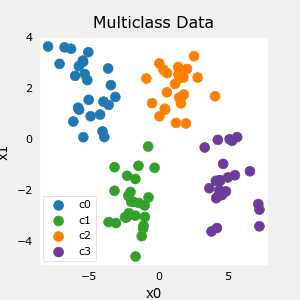

In [16]:
plt_mc(X_train, y_train, classes, centers, std = std)

In [17]:
print(f'unique classes{np.unique(y_train)}')
print(f'class representation{y_train[:10]}')
print(f'shape of X_train:{X_train.shape}, shape of y_train:{y_train.shape}')

unique classes[0 1 2 3]
class representation[3 3 3 0 3 3 3 3 2 0]
shape of X_train:(100, 2), shape of y_train:(100,)


## Model  
2 layers  
4 outputs

In [18]:
tf.random.set_seed(1234)
model = Sequential(
[
    Dense(2,'relu',name = 'L1'),
    Dense(4,'linear',name = 'L2')
])

In [19]:
model.compile(
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
optimizer = tf.keras.optimizers.Adam(0.01),
)

model.fit(X_train,y_train, epochs = 200)

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 1.3259
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 1.2593
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 1.2017
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1626
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1235
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0952
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0689
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0480
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0325
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0181
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0072
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 0.9970
Epoch 13/200
4/4 [==============================] - 0s 4ms/st

4/4 [==============================] - 0s 3ms/step - loss: 0.0843
Epoch 105/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0822
Epoch 106/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0802
Epoch 107/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0783
Epoch 108/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0766
Epoch 109/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0749
Epoch 110/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0734
Epoch 111/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0720
Epoch 112/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0706
Epoch 113/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0692
Epoch 114/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0679
Epoch 115/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0667
Epoch 116/200
4/4 [==============================] - 0

184/184 [==============================] - 0s 2ms/step


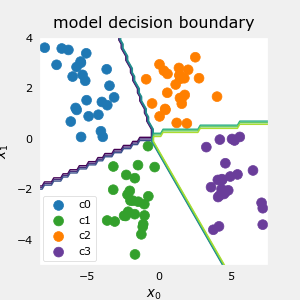

In [20]:
plt_cat_mc(X_train, y_train, model, classes
          )

In [21]:
#gather the trained parameters from the first layer
l1 = model.get_layer('L1')
W1, b1 = l1.get_weights()

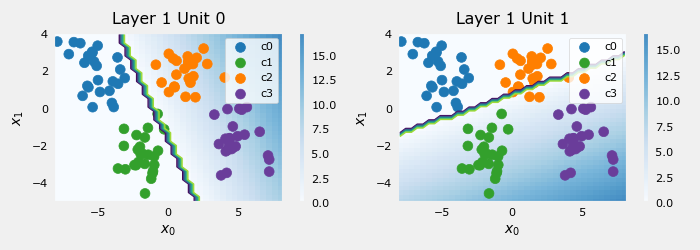

In [22]:
plt_layer_relu(X_train, y_train.reshape(-1,), W1,b1,classes)

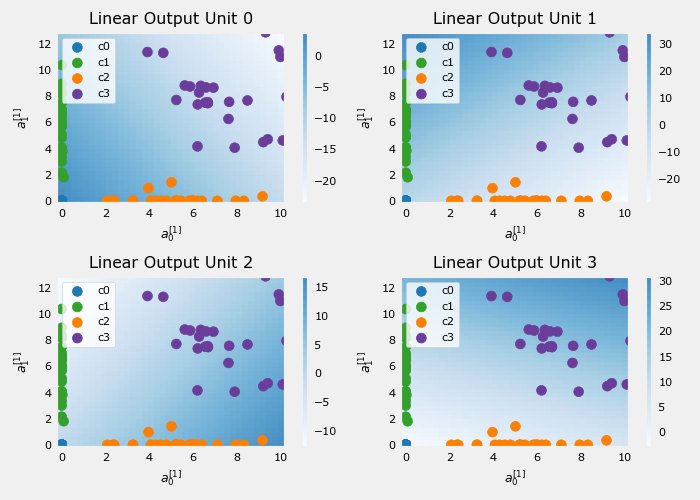

In [26]:
#gather the trained parameters from the output layer
l2 = model.get_layer('L2')
W2, b2 = l2.get_weights()

Xl2 = np.maximum(0,np.dot(X_train, W1)+b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,),W2, b2, classes,
                       x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng=(-0.25,np.amax(Xl2[:,1])))